In [1]:
import numpy as np
import astropy
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import constants as const 
from astropy.visualization import ImageNormalize, AsinhStretch
from astropy.io import fits
import sunpy 
import sunpy.map
from sunpy.coordinates import propagate_with_solar_surface
from scipy.io import readsav
from datetime import datetime
from copy import deepcopy

import matplotlib.pyplot as plt

In [2]:
eis_195_velmap_shift = sunpy.map.Map("../../src/EIS/DHB_007_v2/20221025T0023/sunpymaps/eis_195_velmap_shift.fits")

In [3]:
chase_halpha_cutout_idlsav = readsav("../../src/CHASE/20221024/lvl2/idlsave/cutout0022.sav",verbose=True)

--------------------------------------------------
Date: Mon Mar 18 18:54:12 2024
User: niyw
Host: solarmanage
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.8.0
--------------------------------------------------
Successfully read 7 records of which:
 - 1 are of type TIMESTAMP
 - 4 are of type VARIABLE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - sub0 [<class 'numpy.recarray'>]
 - rsub0 [<class 'numpy.recarray'>]
 - bsub0 [<class 'numpy.recarray'>]
 - vsub0 [<class 'numpy.recarray'>]
--------------------------------------------------


In [4]:
chase_cutout_fits_header = sunpy.map.make_fitswcs_header(chase_halpha_cutout_idlsav["sub0"][0][0],
                                                  SkyCoord(chase_halpha_cutout_idlsav["sub0"][0][1]*u.arcsec,chase_halpha_cutout_idlsav["sub0"][0][2]*u.arcsec,
                                                           obstime=datetime.strptime(chase_halpha_cutout_idlsav["sub0"][0][5].decode('UTF-8'),"%d-%b-%Y %H:%M:%S.%f"),
                                                           observer="Earth",frame="helioprojective",
                                                           rsun=696000000.0*u.m),
                                                  scale=u.Quantity([chase_halpha_cutout_idlsav["sub0"][0][3],chase_halpha_cutout_idlsav["sub0"][0][4]],u.arcsec/u.pix),
                                                  rotation_angle=0*u.deg,
                                                  telescope="CHASE",instrument="RSM")

In [5]:
chase_halpha_core_cutout_map = sunpy.map.Map(chase_halpha_cutout_idlsav["sub0"][0][0], chase_cutout_fits_header)
chase_halpha_core_cutout_map.plot_settings['cmap'] = "grey"

In [6]:
chase_halpha_bw_cutout_map = sunpy.map.Map(chase_halpha_cutout_idlsav["bsub0"][0][0], chase_cutout_fits_header)
chase_halpha_bw_cutout_map.plot_settings['cmap'] = "grey"

In [7]:
chase_halpha_rw_cutout_map = sunpy.map.Map(chase_halpha_cutout_idlsav["rsub0"][0][0], chase_cutout_fits_header)
chase_halpha_rw_cutout_map.plot_settings['cmap'] = "grey"

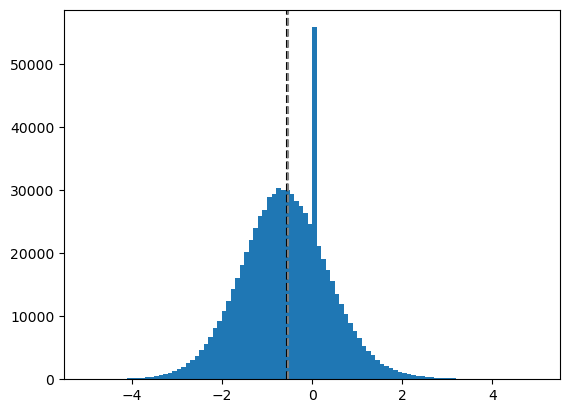

In [8]:
_ = plt.hist(chase_halpha_cutout_idlsav["vsub0"][0][0].flatten(),bins=100,range=[-5,5])
plt.axvline(np.nanmedian(chase_halpha_cutout_idlsav["vsub0"][0][0]),color="black",linestyle="--")
plt.axvline(np.nanmean(chase_halpha_cutout_idlsav["vsub0"][0][0]),color="grey",linestyle="--")

In [9]:
chase_halpha_doppler_cutout_map = sunpy.map.Map(chase_halpha_cutout_idlsav["vsub0"][0][0] - np.nanmedian(chase_halpha_cutout_idlsav["vsub0"][0][0]), chase_cutout_fits_header)
chase_halpha_doppler_cutout_map.plot_settings['cmap'] = "coolwarm"
chase_halpha_doppler_cutout_map.plot_settings['norm'] = ImageNormalize(vmin=-3,vmax=3)

In [10]:
Txshift_chase_aia, Tyshift_chase_aia = 0.143954*u.arcsec, 1.06003*u.arcsec

In [11]:
chase_halpha_core_cutout_map_crop = chase_halpha_core_cutout_map.submap(SkyCoord(-550*u.arcsec,100*u.arcsec,frame=chase_halpha_core_cutout_map.coordinate_frame),
                                                                top_right=SkyCoord(-250*u.arcsec,400*u.arcsec,frame=chase_halpha_core_cutout_map.coordinate_frame))
chase_halpha_core_cutout_map_crop = chase_halpha_core_cutout_map_crop.shift_reference_coord(Txshift_chase_aia,Tyshift_chase_aia)

chase_halpha_bw_cutout_map_crop = chase_halpha_bw_cutout_map.submap(SkyCoord(-550*u.arcsec,100*u.arcsec,frame=chase_halpha_bw_cutout_map.coordinate_frame),
                                                                top_right=SkyCoord(-250*u.arcsec,400*u.arcsec,frame=chase_halpha_bw_cutout_map.coordinate_frame))
chase_halpha_bw_cutout_map_crop = chase_halpha_bw_cutout_map_crop.shift_reference_coord(Txshift_chase_aia,Tyshift_chase_aia)

chase_halpha_rw_cutout_map_crop = chase_halpha_rw_cutout_map.submap(SkyCoord(-550*u.arcsec,100*u.arcsec,frame=chase_halpha_rw_cutout_map.coordinate_frame),
                                                                top_right=SkyCoord(-250*u.arcsec,400*u.arcsec,frame=chase_halpha_rw_cutout_map.coordinate_frame))
chase_halpha_rw_cutout_map_crop = chase_halpha_rw_cutout_map_crop.shift_reference_coord(Txshift_chase_aia,Tyshift_chase_aia)

chase_halpha_doppler_cutout_map_crop = chase_halpha_doppler_cutout_map.submap(SkyCoord(-550*u.arcsec,100*u.arcsec,frame=chase_halpha_doppler_cutout_map.coordinate_frame),
                                                                top_right=SkyCoord(-250*u.arcsec,400*u.arcsec,frame=chase_halpha_doppler_cutout_map.coordinate_frame))
chase_halpha_doppler_cutout_map_crop = chase_halpha_doppler_cutout_map_crop.shift_reference_coord(Txshift_chase_aia,Tyshift_chase_aia)

For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crlt_obs,dsun_obs,crln_obs
 [sunpy.map.mapbase]


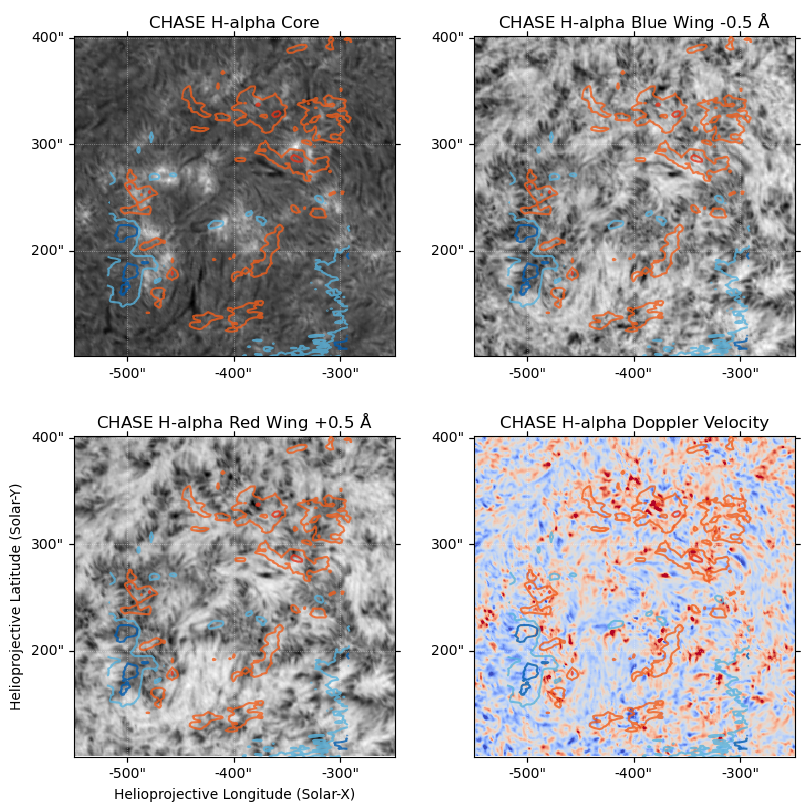

In [12]:
fig = plt.figure(figsize=(8,8),constrained_layout=True)

ax1 = fig.add_subplot(221,projection=chase_halpha_core_cutout_map_crop)
chase_halpha_core_cutout_map_crop.plot(axes=ax1,title="CHASE H-alpha Core")

ax2 = fig.add_subplot(222,projection=chase_halpha_bw_cutout_map_crop)
chase_halpha_bw_cutout_map_crop.plot(axes=ax2,title=r"CHASE H-alpha Blue Wing -0.5 $\rm \AA$")

ax3 = fig.add_subplot(223,projection=chase_halpha_rw_cutout_map_crop)
chase_halpha_rw_cutout_map_crop.plot(axes=ax3,title=r"CHASE H-alpha Red Wing +0.5 $\rm \AA$")

ax4 = fig.add_subplot(224,projection=chase_halpha_doppler_cutout_map_crop)
chase_halpha_doppler_cutout_map_crop.plot(axes=ax4,title="CHASE H-alpha Doppler Velocity")

for ax_ in (ax1,ax2,ax4):
    ax_.set_xlabel(" ")
    ax_.set_ylabel(" ")

for ax_ in (ax1,ax2,ax3,ax4):
    bounds = ax_.axis()
    with propagate_with_solar_surface(rotation_model="rigid"):
        eis_195_velmap_shift.draw_contours(levels=[-10,-5,5,10],colors=["#005CAF","#58B2DC","#F05E1C","#E83015"],axes=ax_,alpha=0.8)
    ax_.axis(bounds)




In [13]:
chase_halpha_doppler_cutout_map_crop.save("../../src/coalign_map/20221024/chase_halpha_doppler_map.fits",overwrite=True)

In [14]:
with fits.open("../../src/CHASE/20221024/lvl2/fits/RSM20221024T191230_0022_HA.fits") as hdul:
    hdul.info()
    chase_header = deepcopy(hdul[1].header)
    chase_halpha_core_data = hdul[1].data[70,:,:]
    chase_halpha_rw_40_data = hdul[1].data[70+18,:,:]
    chase_halpha_bw_40_data = hdul[1].data[70-18,:,:]
    average_halpha_profile = np.nanmean(hdul[1].data[:,:,:],axis=(1,2))

Filename: ../../src/CHASE/20221024/lvl2/fits/RSM20221024T191230_0022_HA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2304, 2313)   int16   
  1  COMPRESSED_IMAGE    1 CompImageHDU     49   (2304, 2313, 118)   int16   


In [15]:
chase_fits_header = sunpy.map.make_fitswcs_header(chase_halpha_core_data.shape,
                                                  SkyCoord(chase_header["CRVAL1"]*u.arcsec,chase_header["CRVAL2"]*u.arcsec,
                                                           obstime=chase_header["DATE_OBS"],observer="Earth",frame="helioprojective",
                                                           rsun=696000000.0*u.m),
                                                  reference_pixel=[chase_header["CRPIX1"]-1,chase_header["CRPIX2"]-1]*u.pix,
                                                  scale=u.Quantity([chase_header["CDELT1"],chase_header["CDELT2"]],u.arcsec/u.pix),
                                                  rotation_angle=-chase_header["INST_ROT"]*u.deg,
                                                  telescope="CHASE",instrument="RSM")

In [16]:
chase_wavelength = (np.arange(chase_header["NAXIS3"]) + 1 - (chase_header["CRPIX3"] + 1))*chase_header["CDELT3"] + chase_header["CRVAL3"]
# it seems that the crpix3 is 0, which is not consistent with the FITS index starting from 1
# so I will add 1 to the crpix3

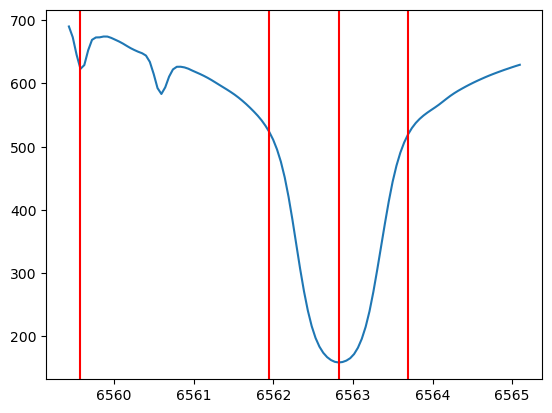

In [17]:
plt.plot(chase_wavelength,average_halpha_profile)
plt.axvline(chase_wavelength[3],color="r")
plt.axvline(chase_wavelength[70],color="r")
plt.axvline(chase_wavelength[70-18],color="r")
plt.axvline(chase_wavelength[70+18],color="r")

In [18]:
chase_halpha_rw_40_map = sunpy.map.Map(chase_halpha_rw_40_data, chase_fits_header)
chase_halpha_rw_40_map_crop = chase_halpha_rw_40_map.submap(SkyCoord(-550*u.arcsec,100*u.arcsec,frame=chase_halpha_rw_40_map.coordinate_frame),
                                                            top_right=SkyCoord(-250*u.arcsec,400*u.arcsec,frame=chase_halpha_rw_40_map.coordinate_frame))
chase_halpha_rw_40_map_crop = chase_halpha_rw_40_map_crop.shift_reference_coord(Txshift_chase_aia,Tyshift_chase_aia)

chase_halpha_bw_40_map = sunpy.map.Map(chase_halpha_bw_40_data, chase_fits_header)
chase_halpha_bw_40_map_crop = chase_halpha_bw_40_map.submap(SkyCoord(-550*u.arcsec,100*u.arcsec,frame=chase_halpha_bw_40_map.coordinate_frame),
                                                            top_right=SkyCoord(-250*u.arcsec,400*u.arcsec,frame=chase_halpha_bw_40_map.coordinate_frame))
chase_halpha_bw_40_map_crop = chase_halpha_bw_40_map_crop.shift_reference_coord(Txshift_chase_aia,Tyshift_chase_aia)

In [20]:
chase_halpha_bw_rp_map_crop = sunpy.map.Map(chase_halpha_bw_40_map_crop.data - chase_halpha_rw_40_map_crop.data, chase_halpha_bw_40_map_crop.meta)

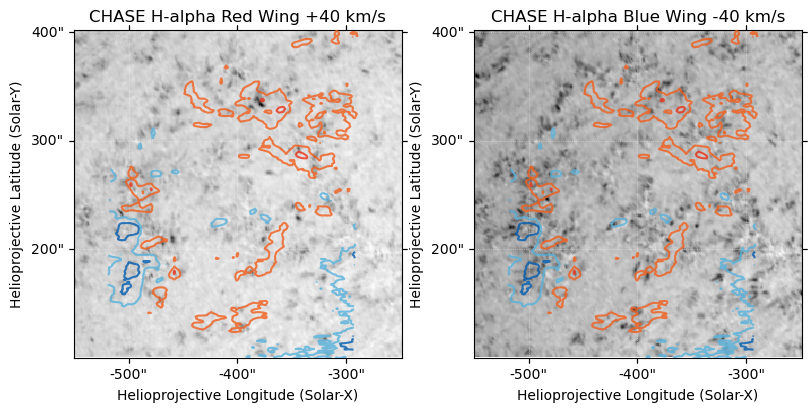

In [19]:
fig = plt.figure(figsize=(8,4),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=chase_halpha_rw_40_map_crop)
chase_halpha_rw_40_map_crop.plot(axes=ax1,title="CHASE H-alpha Red Wing +40 km/s")

ax2 = fig.add_subplot(122,projection=chase_halpha_bw_40_map_crop)
chase_halpha_bw_40_map_crop.plot(axes=ax2,title="CHASE H-alpha Blue Wing -40 km/s")

for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    with propagate_with_solar_surface(rotation_model="rigid"):
        eis_195_velmap_shift.draw_contours(levels=[-10,-5,5,10],colors=["#005CAF","#58B2DC","#F05E1C","#E83015"],axes=ax_,alpha=0.8)
    ax_.axis(bounds)

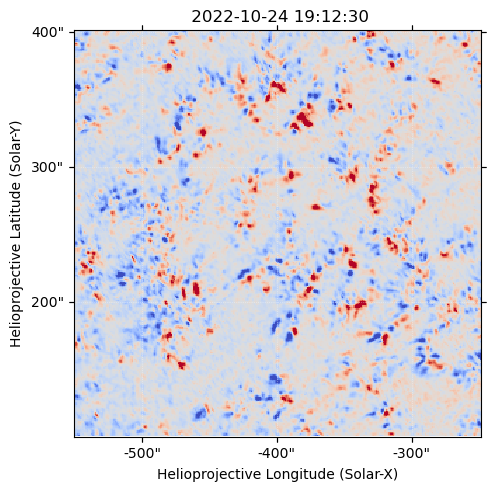

In [21]:
fig = plt.figure(layout='constrained')

ax = fig.add_subplot(projection=chase_halpha_bw_rp_map_crop)
chase_halpha_bw_rp_map_crop.plot(axes=ax,vmin=-100,vmax=100,cmap='coolwarm')